In [1]:
import pandas as pd

data = pd.read_csv("../data/AAPL_data.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1258 non-null   object 
 1   Open          1258 non-null   float64
 2   High          1258 non-null   float64
 3   Low           1258 non-null   float64
 4   Close         1258 non-null   float64
 5   Volume        1258 non-null   int64  
 6   Dividends     1258 non-null   float64
 7   Stock Splits  1258 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 78.8+ KB


In [2]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-12-23 00:00:00-05:00,67.992226,68.893845,67.953445,68.833252,98572000,0.0,0.0
1,2019-12-24 00:00:00-05:00,69.000488,69.048965,68.571495,68.898689,48478800,0.0,0.0
2,2019-12-26 00:00:00-05:00,69.032028,70.282661,69.002944,70.265694,93121200,0.0,0.0
3,2019-12-27 00:00:00-05:00,70.558937,71.249695,69.831825,70.239006,146266000,0.0,0.0
4,2019-12-30 00:00:00-05:00,70.156593,70.939453,69.128944,70.655876,144114400,0.0,0.0


In [3]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000
mean,151.304161,152.987860,149.758852,151.462089,9.090932e+07,0.003595,0.003180
std,41.839015,42.049631,41.663632,41.894687,5.317032e+07,0.028374,0.112777
min,55.411085,55.513122,51.652713,54.509754,2.404830e+07,0.000000,0.000000
25%,125.955053,127.783446,124.240192,125.952068,5.577990e+07,0.000000,0.000000
50%,150.182523,152.182405,148.571452,150.295227,7.648380e+07,0.000000,0.000000
75%,176.406395,178.258130,175.204806,176.540646,1.081673e+08,0.000000,0.000000
max,252.160004,255.000000,249.779999,254.490005,4.265100e+08,0.250000,4.000000


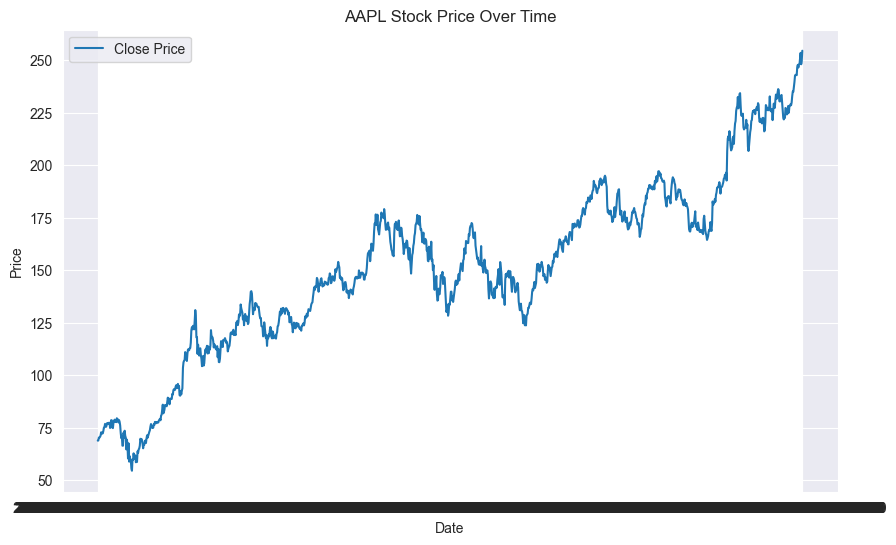

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Close'], label = 'Close Price')
plt.title("AAPL Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

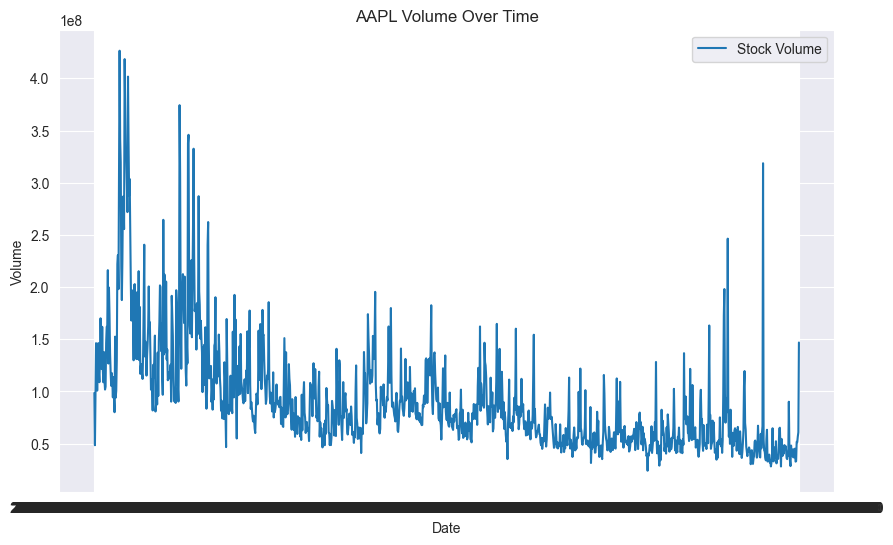

In [5]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Volume'], label = 'Stock Volume')
plt.title("AAPL Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

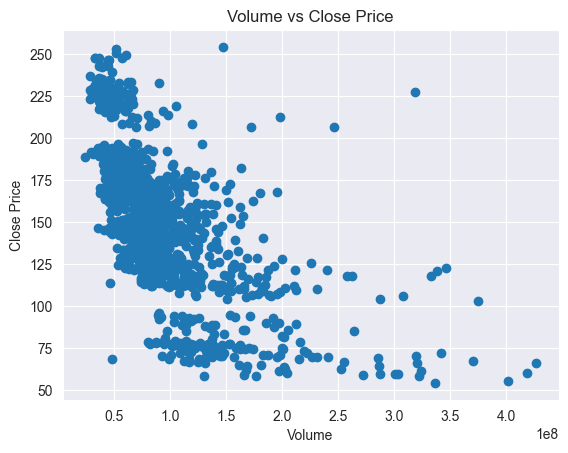

In [6]:
plt.scatter(data['Volume'], data['Close'])
plt.title("Volume vs Close Price")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.show()

In [7]:
corr_matrix = data.select_dtypes(include = 'number').corr()
corr_matrix

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999395,0.999397,0.998650,-0.632158,0.012356,-0.018050
High,0.999395,1.000000,0.999252,0.999393,-0.624041,0.011209,-0.016849
Low,0.999397,0.999252,1.000000,0.999388,-0.640510,0.012403,-0.018124
Close,0.998650,0.999393,0.999388,1.000000,-0.632591,0.011938,-0.017173
Volume,-0.632158,-0.624041,-0.640510,-0.632591,1.000000,-0.027634,0.071533
Dividends,0.012356,0.011209,0.012403,0.011938,-0.027634,1.000000,-0.003575
Stock Splits,-0.018050,-0.016849,-0.018124,-0.017173,0.071533,-0.003575,1.000000


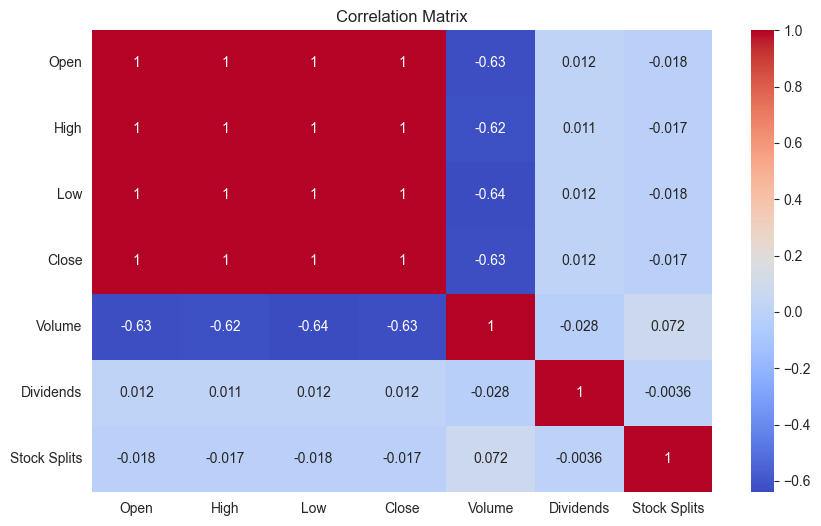

In [8]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.show()

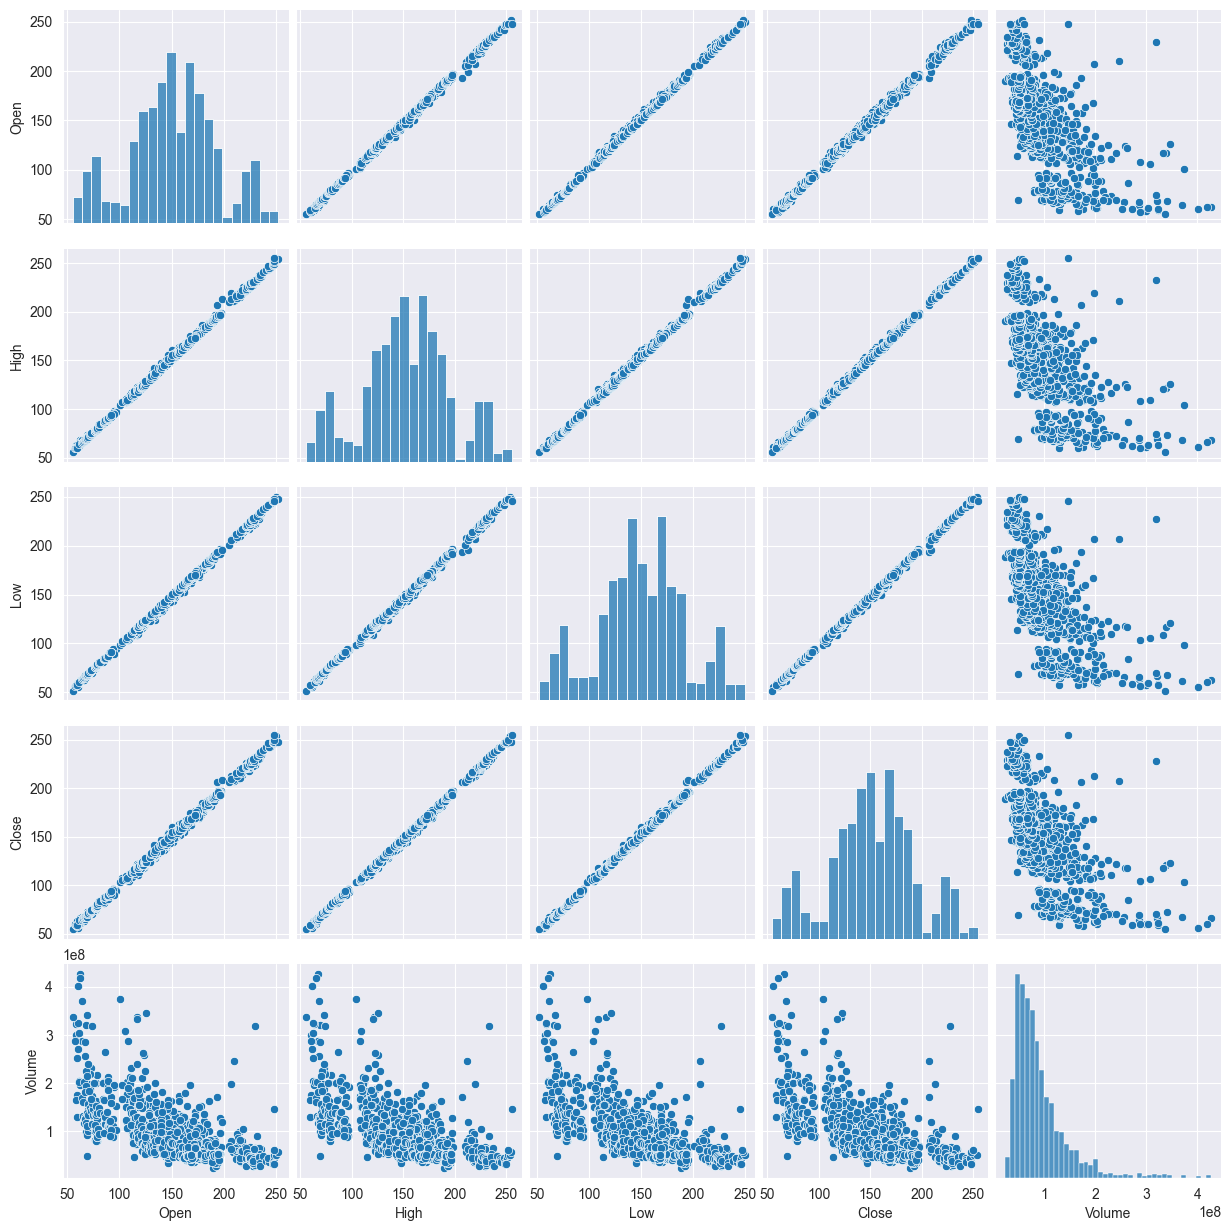

In [9]:
sns.pairplot(data[['Open', 'High', 'Low', 'Close', 'Volume']])

<Axes: >

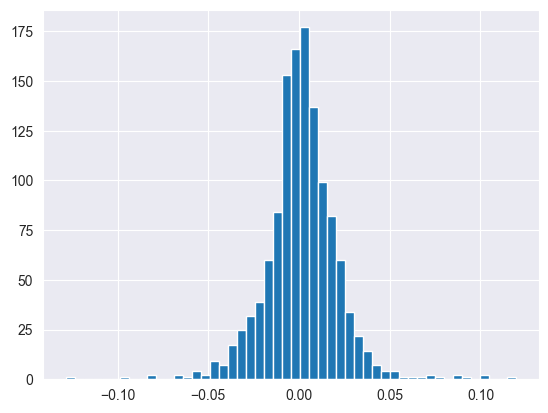

In [10]:
data['Daily_Return'] = data['Close'].pct_change()
data['Daily_Return'].hist(bins=50)

<Axes: >

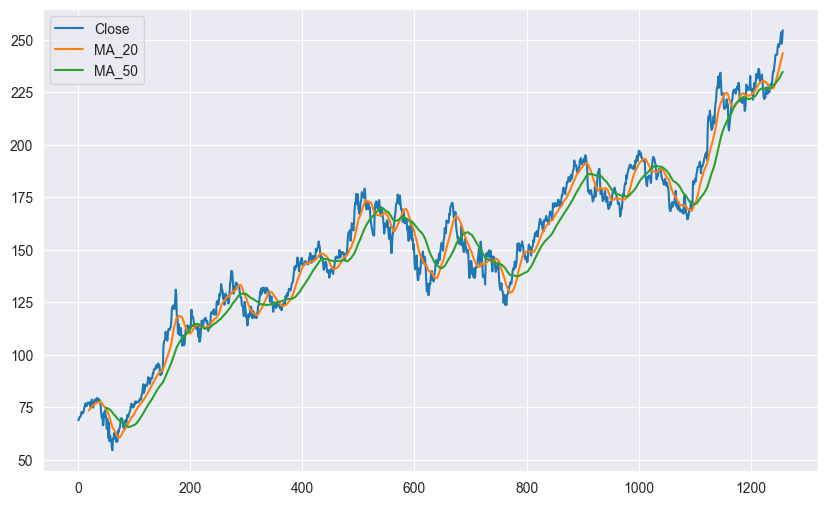

In [11]:
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

data[['Close', 'MA_20', 'MA_50']].plot(figsize=(10, 6))